<a href="https://colab.research.google.com/github/rpawantunai/platformertank/blob/main/SKU_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To describe a method to compute the similarity between two baskets

[Dataset](https://docs.google.com/spreadsheets/d/1U9goiuD367JYHDqgs3IkY8fm-iLGTu-Nm-X39FmdjvU/edit#gid=783357716)

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

#Prepare SKU basket data

In [35]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('SKU Basket Dataset')
worksheet = worksheet.worksheet('Sheet1')

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
raw_pd = pd.DataFrame.from_records(rows)
new_header = raw_pd.iloc[0] #grab the first row for the header
raw_pd = raw_pd[1:] #take the data less the header row
raw_pd.columns = new_header #set the header row as the df header
raw_pd = raw_pd.iloc[:,0:8] # Retrieve all rows starting from first row and first 7 columns
raw_pd=raw_pd.replace(r'^\s*$', np.nan, regex=True) # Replace field that's entirely space (or empty) with NaN
raw_pd=raw_pd.dropna(subset=['name']) # Drop the rows where name is missing
raw_pd.head()

,merchant_id,supplier_id,created_at,order_id,sku_id,name,requested_qty,price
1,5e4d17c4b9a6b41beab41d8a,5e4601c7b9a6b41beab41a53,2021-03-01 6:53:50,30996,NaN,KOPI LIONG,1,NaN
2,5e4d17c4b9a6b41beab41d8a,5e4601c7b9a6b41beab41a53,2021-03-01 6:53:50,30996,NaN,KAPAL API MIX,3,NaN
3,5e4d17c4b9a6b41beab41d8a,5e4601c7b9a6b41beab41a53,2021-03-01 6:53:50,30996,NaN,INDOMIE GORENG,3,NaN
4,5e4d17c4b9a6b41beab41d8a,5e4601c7b9a6b41beab41a53,2021-03-01 6:53:50,30996,NaN,INDOMIE SOTO,2,NaN
5,5e4d17c4b9a6b41beab41d8a,5e4601c7b9a6b41beab41a53,2021-03-01 6:53:50,30996,NaN,SEDAP KOREA,1,NaN


In [36]:
# combining sku name with same order_id rows into one list
prev_order_id = ''
new_list = []
l = []
index = 1
for rows in raw_pd.itertuples():
  if(prev_order_id == rows.order_id):
    l.append(rows.name)
  else:
    if(index == 1):
      l = []
      l.append(rows.name)
    else:
      temp_row = [rows.merchant_id,prev_order_id, l]
      new_list.append(temp_row)
      l = []
      l.append(rows.name)
    prev_order_id = rows.order_id
  index += 1

In [37]:
new_list[1]

['5ed716a4fe16a556ceb888c8',
 '31070',
 ['GUDANG GARAM FILTER',
  'DJARUM SUPER',
  'SAMPOERNA MILD',
  'DJISAMSOE',
  'SAMPOERNA KRETEK',
  'PRO MILD',
  'SURYA PRO']]

In [38]:
new_list[2]

['5ddfa36bb9a6b4286bd60e34',
 '31117',
 ['TERIGU SEGITIGA',
  'INDOCAFE',
  'GULA PASIR',
  'MINYAK CURAH',
  'TOLAK ANGIN CAIR 15ML',
  'GILUS MIX GULA AREN',
  'PEPSODENT 120 GR',
  'PEPSODENT 90 GR',
  'EKONOMI 1000',
  'SEDAP KARI SPECIAL',
  'KACANG TANAH',
  'CUKA',
  'TERASI',
  'POP MIE MINI',
  'TISSUE 2000',
  'MILKU',
  'SOSIS SAPI',
  'INDOMIE AYAM GEPREK',
  'SOSIS OTAK OTAK',
  'SUNLIGHT 755 ML',
  'LADAKU',
  'A MILD 16',
  'A MILD 12',
  'VIP',
  'ZIGA',
  'U MILD',
  'LA BOLD',
  'ESSE SHUFFEL POP',
  'GUDANG GARAM FILTER',
  'MUSTANG',
  'SAMPOERNA KRETEK',
  'DJISAMSOE REFILL',
  'LA ICE',
  'LA MILD 16',
  'EVOLUTION',
  'VIGOR FILTER',
  'PIALA',
  'ROYCO AYAM',
  'FRISIAN FLAG PUTIH',
  'FRISIAN FLAG COKLAT',
  'DANCOW PUTIH',
  'SOKLIN CAIR',
  'SUPER STAR',
  'BENG BENG',
  'OISHI']]

#Approach B: using NLP processing on Indonesian language, with BOW (or tf-idf, or tf-isf) approach

In [39]:
import pickle
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
product_type_pd = pd.read_csv('product_type_codes.csv')
model1 = tf.keras.models.load_model('model.keras')

In [40]:
max_length = 30
trunc_type='post'

seqs = tokenizer.texts_to_sequences(array(["BENG BENG DRINK 30GR K10","Beng Beng Drink 10x30g"]))
seqs_padded = pad_sequences(seqs,maxlen=max_length, truncating=trunc_type)

ynew = model1.predict(seqs_padded)
classes = np.argmax(ynew, axis = 1)
print(classes)

ret_pd = product_type_pd.loc[product_type_pd['product_type_code'] == classes[1]]
print(ret_pd['product_type'].iloc[0])

[30 30]
Minuman Sachet


In [41]:
new_list

[['5f100db8fe16a50d62bc97bf',
  '30996',
  ['KOPI LIONG',
   'KAPAL API MIX',
   'INDOMIE GORENG',
   'INDOMIE SOTO',
   'SEDAP KOREA',
   'BERAS RAMOS',
   'BABY HAPPY L',
   'BABY HAPPY M',
   'CHAHRM',
   'SASA 1000',
   'INDOMIE KARI',
   'KECAP BANGO',
   'SUSU FRISIAN FLAG PUTIH',
   'SAMPOERNA MILD',
   'GUDANG GARAM FILTER',
   'SAMPOERNA KRETEK',
   'GUDANG GARAM FILTER CAN',
   'MAGNUM BLUE']],
 ['5ed716a4fe16a556ceb888c8',
  '31070',
  ['GUDANG GARAM FILTER',
   'DJARUM SUPER',
   'SAMPOERNA MILD',
   'DJISAMSOE',
   'SAMPOERNA KRETEK',
   'PRO MILD',
   'SURYA PRO']],
 ['5ddfa36bb9a6b4286bd60e34',
  '31117',
  ['TERIGU SEGITIGA',
   'INDOCAFE',
   'GULA PASIR',
   'MINYAK CURAH',
   'TOLAK ANGIN CAIR 15ML',
   'GILUS MIX GULA AREN',
   'PEPSODENT 120 GR',
   'PEPSODENT 90 GR',
   'EKONOMI 1000',
   'SEDAP KARI SPECIAL',
   'KACANG TANAH',
   'CUKA',
   'TERASI',
   'POP MIE MINI',
   'TISSUE 2000',
   'MILKU',
   'SOSIS SAPI',
   'INDOMIE AYAM GEPREK',
   'SOSIS OTAK OTAK',

In [64]:
processed_pd = pd.DataFrame(new_list)

processed_pd.columns = ['merchant_id','order_id','name']

processed_pd

,merchant_id,order_id,name
0,5f100db8fe16a50d62bc97bf,30996,"[KOPI LIONG, KAPAL API MIX, INDOMIE GORENG, IN..."
1,5ed716a4fe16a556ceb888c8,31070,"[GUDANG GARAM FILTER, DJARUM SUPER, SAMPOERNA ..."
2,5ddfa36bb9a6b4286bd60e34,31117,"[TERIGU SEGITIGA, INDOCAFE, GULA PASIR, MINYAK..."
3,5e3cc039fe16a51d81cb6f01,31129,"[MARLBORO CAMPUR, GG FILTER KALENG, DUNHILL PU..."
4,5dfb2270b9a6b475bf66aed2,31130,"[MAGNUM BLUE, MAGNUM BLACK, GMP KUNING 50 KG, ..."
...,...,...,...
539,605c621a99adf50008d10a05,53999,"[GULA PASIR, GULA MERAH, SETIA BALI 200 GR, SE..."
540,60643a9039e5380008a28043,54011,"[DUNHIL FINECUTMILD 16, KOREK API TOKAI, DJARU..."
541,605eb37239e5380008a27f16,54031,"[MIXAGRIP FLU BATUK, ULTRAFLU, NAPACIN, DJ SUP..."
542,6062ef0299adf50008d10b60,54046,"[MARLBORO FILTER BLACK, MAGNUM FILTER, NESLITE..."


In [49]:
processed_pd.loc[processed_pd['merchant_id'] == '5f100db8fe16a50d62bc97bf']

,merchant_id,order_id,name
0,5f100db8fe16a50d62bc97bf,30996,"[KOPI LIONG, KAPAL API MIX, INDOMIE GORENG, IN..."
113,5f100db8fe16a50d62bc97bf,38230,"[DJARUM SUPER 12, MARLBORO ICE BLAST]"
377,5f100db8fe16a50d62bc97bf,51822,"[GG FILTER, SURYA PRO MERAH, NESLITE, LA BOLD ..."


In [61]:
processed_pd.loc[processed_pd['merchant_id'] == '5dfb2270b9a6b475bf66aed2']

,merchant_id,order_id,name
4,5dfb2270b9a6b475bf66aed2,31130,"[MAGNUM BLUE, MAGNUM BLACK, GMP KUNING 50 KG, ..."
467,5dfb2270b9a6b475bf66aed2,53104,"[PISANG TANDUK CONVENTIONAL 1 PCS, PISANG TAND..."


In [72]:
processed_pd.loc[processed_pd['order_id'] == '31130']['name']

4    [MAGNUM BLUE, MAGNUM BLACK, GMP KUNING 50 KG, ...
Name: name, dtype: object

In [83]:
processed_pd.loc[processed_pd['order_id'] == '31130']['name'].values.tolist()

[['MAGNUM BLUE',
  'MAGNUM BLACK',
  'GMP KUNING 50 KG',
  'ABC SAMBAL ASLI 20GR R30',
  'PANTHER 175ML',
  'NESLITE MERAH',
  'SAMPOERNA MILD 16',
  'ULTRA MILK COKLAT 200ML',
  'ENVIO KRETEK']]

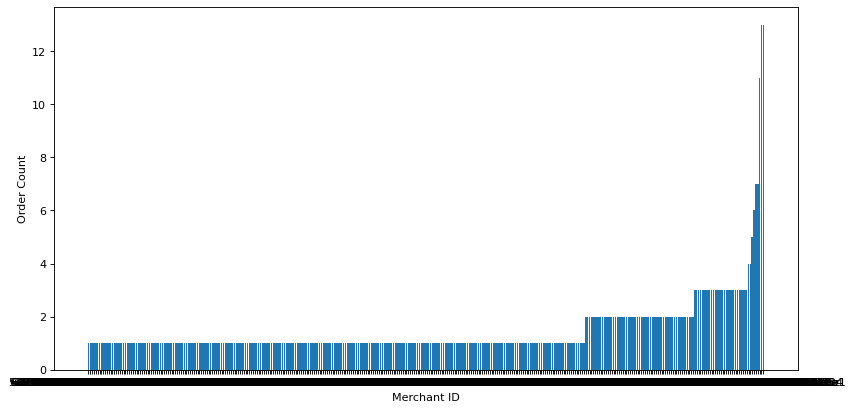

In [56]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

pd_count = processed_pd.groupby('merchant_id').count()
pd_count = pd_count.sort_values(by ='order_id')

plt.xlabel("Merchant ID")
plt.ylabel("Order Count")
plt.bar(pd_count.index, height=pd_count.order_id)
plt.show()

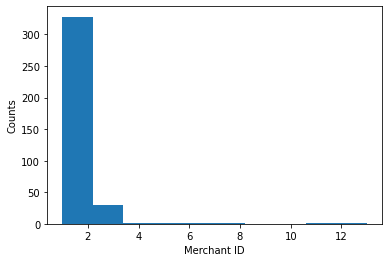

In [58]:
plt.hist(pd_count['order_id'], density=False, bins=10)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Merchant ID');

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

print(processed_pd.loc[processed_pd['order_id'] == '30996']['name'].values.tolist())
print(processed_pd.loc[processed_pd['order_id'] == '31130']['name'].values.tolist())

cosine_sim(processed_pd.loc[processed_pd['order_id'] == '30996']['name'].values.tolist()[0][0],
           processed_pd.loc[processed_pd['order_id'] == '31130']['name'].values.tolist()[0][0])

def compareBasket(basket1, basket2): # basket is in 2D List format [['abc','def']]
  basket1_len = len(basket1[0])
  basket2_len = len(basket2[0])
  #print('basket1 size: ', basket1_len)
  #print('basket2 size: ', basket2_len)

  ret = []
  if(basket1_len <= basket2_len):
    for i in basket1[0]:
      for j in basket2[0]:
        dist = cosine_sim(i,j)
        #print(i,',',j,':',dist)
        ret.append(dist)
  else:
    for i in basket2[0]:
      for j in basket1[0]:
        dist = cosine_sim(i,j)
        #print(i,',',j,':',dist)
        ret.append(dist)
  return ret
  #print('ret size: ', len(ret))
  #print('ret: ', ret)

[['KOPI LIONG', 'KAPAL API MIX', 'INDOMIE GORENG', 'INDOMIE SOTO', 'SEDAP KOREA', 'BERAS RAMOS', 'BABY HAPPY L', 'BABY HAPPY M', 'CHAHRM', 'SASA 1000', 'INDOMIE KARI', 'KECAP BANGO', 'SUSU FRISIAN FLAG PUTIH', 'SAMPOERNA MILD', 'GUDANG GARAM FILTER', 'SAMPOERNA KRETEK', 'GUDANG GARAM FILTER CAN', 'MAGNUM BLUE']]
[['MAGNUM BLUE', 'MAGNUM BLACK', 'GMP KUNING 50 KG', 'ABC SAMBAL ASLI 20GR R30', 'PANTHER 175ML', 'NESLITE MERAH', 'SAMPOERNA MILD 16', 'ULTRA MILK COKLAT 200ML', 'ENVIO KRETEK']]


In [109]:
ret = compareBasket(processed_pd.loc[processed_pd['order_id'] == '30996']['name'].values.tolist(),
                    processed_pd.loc[processed_pd['order_id'] == '31130']['name'].values.tolist())
print(ret)

print(np.min(ret))
print(np.max(ret))
print(np.mean(ret))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3360969272762574, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7092972666062738, 0.0, 0.2605556710562624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3360969272762574, 0.0, 0.0]
0.0
0.9999999999999998
0.01630893081614229
